In [72]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor ,DecisionTreeClassifier ,plot_tree
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import mean_absolute_error ,r2_score,mean_squared_error 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [73]:
df=pd.read_csv("iris.csv")

In [74]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [76]:
df.drop("Id",axis=1,inplace=True)

In [77]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [78]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [79]:
df['Species'].unique

<bound method Series.unique of 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object>

In [80]:
df['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

<AxesSubplot:xlabel='Species', ylabel='count'>

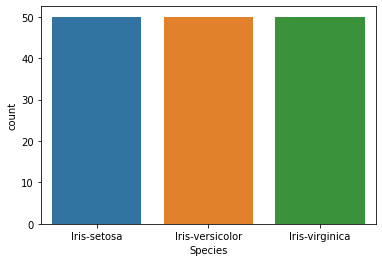

In [81]:
sns.countplot(df["Species"])

In [82]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [83]:
df['Species'].replace({"Iris-setosa":1,"Iris-versicolor": 2,"Iris-virginica":3},inplace=True)

In [84]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [85]:
x=df.drop('Species',axis=1)
y=df['Species']

In [86]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [87]:
y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Species, Length: 150, dtype: int64

# Train test split

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [89]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
8,4.4,2.9,1.4,0.2
106,4.9,2.5,4.5,1.7
76,6.8,2.8,4.8,1.4
9,4.9,3.1,1.5,0.1
89,5.5,2.5,4.0,1.3
...,...,...,...,...
37,4.9,3.1,1.5,0.1
2,4.7,3.2,1.3,0.2
33,5.5,4.2,1.4,0.2
52,6.9,3.1,4.9,1.5


In [90]:
dt_clf=DecisionTreeClassifier()
dt_reg

DecisionTreeClassifier()

In [91]:
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

# model testing

In [92]:
y_pred=dt_clf.predict(x_test)
y_pred[5:10]

array([2, 1, 1, 3, 2], dtype=int64)

In [93]:
y_test[5:10]

56     2
22     1
20     1
147    3
84     2
Name: Species, dtype: int64

# evaluation

In [94]:
# testing data accuaracy
y_pred=dt_clf.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print("the value of mse is",mse)
print("*"*50)
rmse=np.sqrt(mse)
print("the value of rmse is",rmse)
print("*"*50)
r2_value=r2_score(y_test,y_pred)
print("the value of r2_value is",r2_value)

the value of mse is 0.06666666666666667
**************************************************
the value of rmse is 0.2581988897471611
**************************************************
the value of r2_value is 0.9


In [95]:
# training data accuaracy
y_pred_train=dt_clf.predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
print("the value of mse is",mse)
print("*"*50)
rmse=np.sqrt(mse)
print("the value of rmse is",rmse)
print("*"*50)
r2_value=r2_score(y_train,y_pred_train)
print("the value of r2_value is",r2_value)

the value of mse is 0.0
**************************************************
the value of rmse is 0.0
**************************************************
the value of r2_value is 1.0


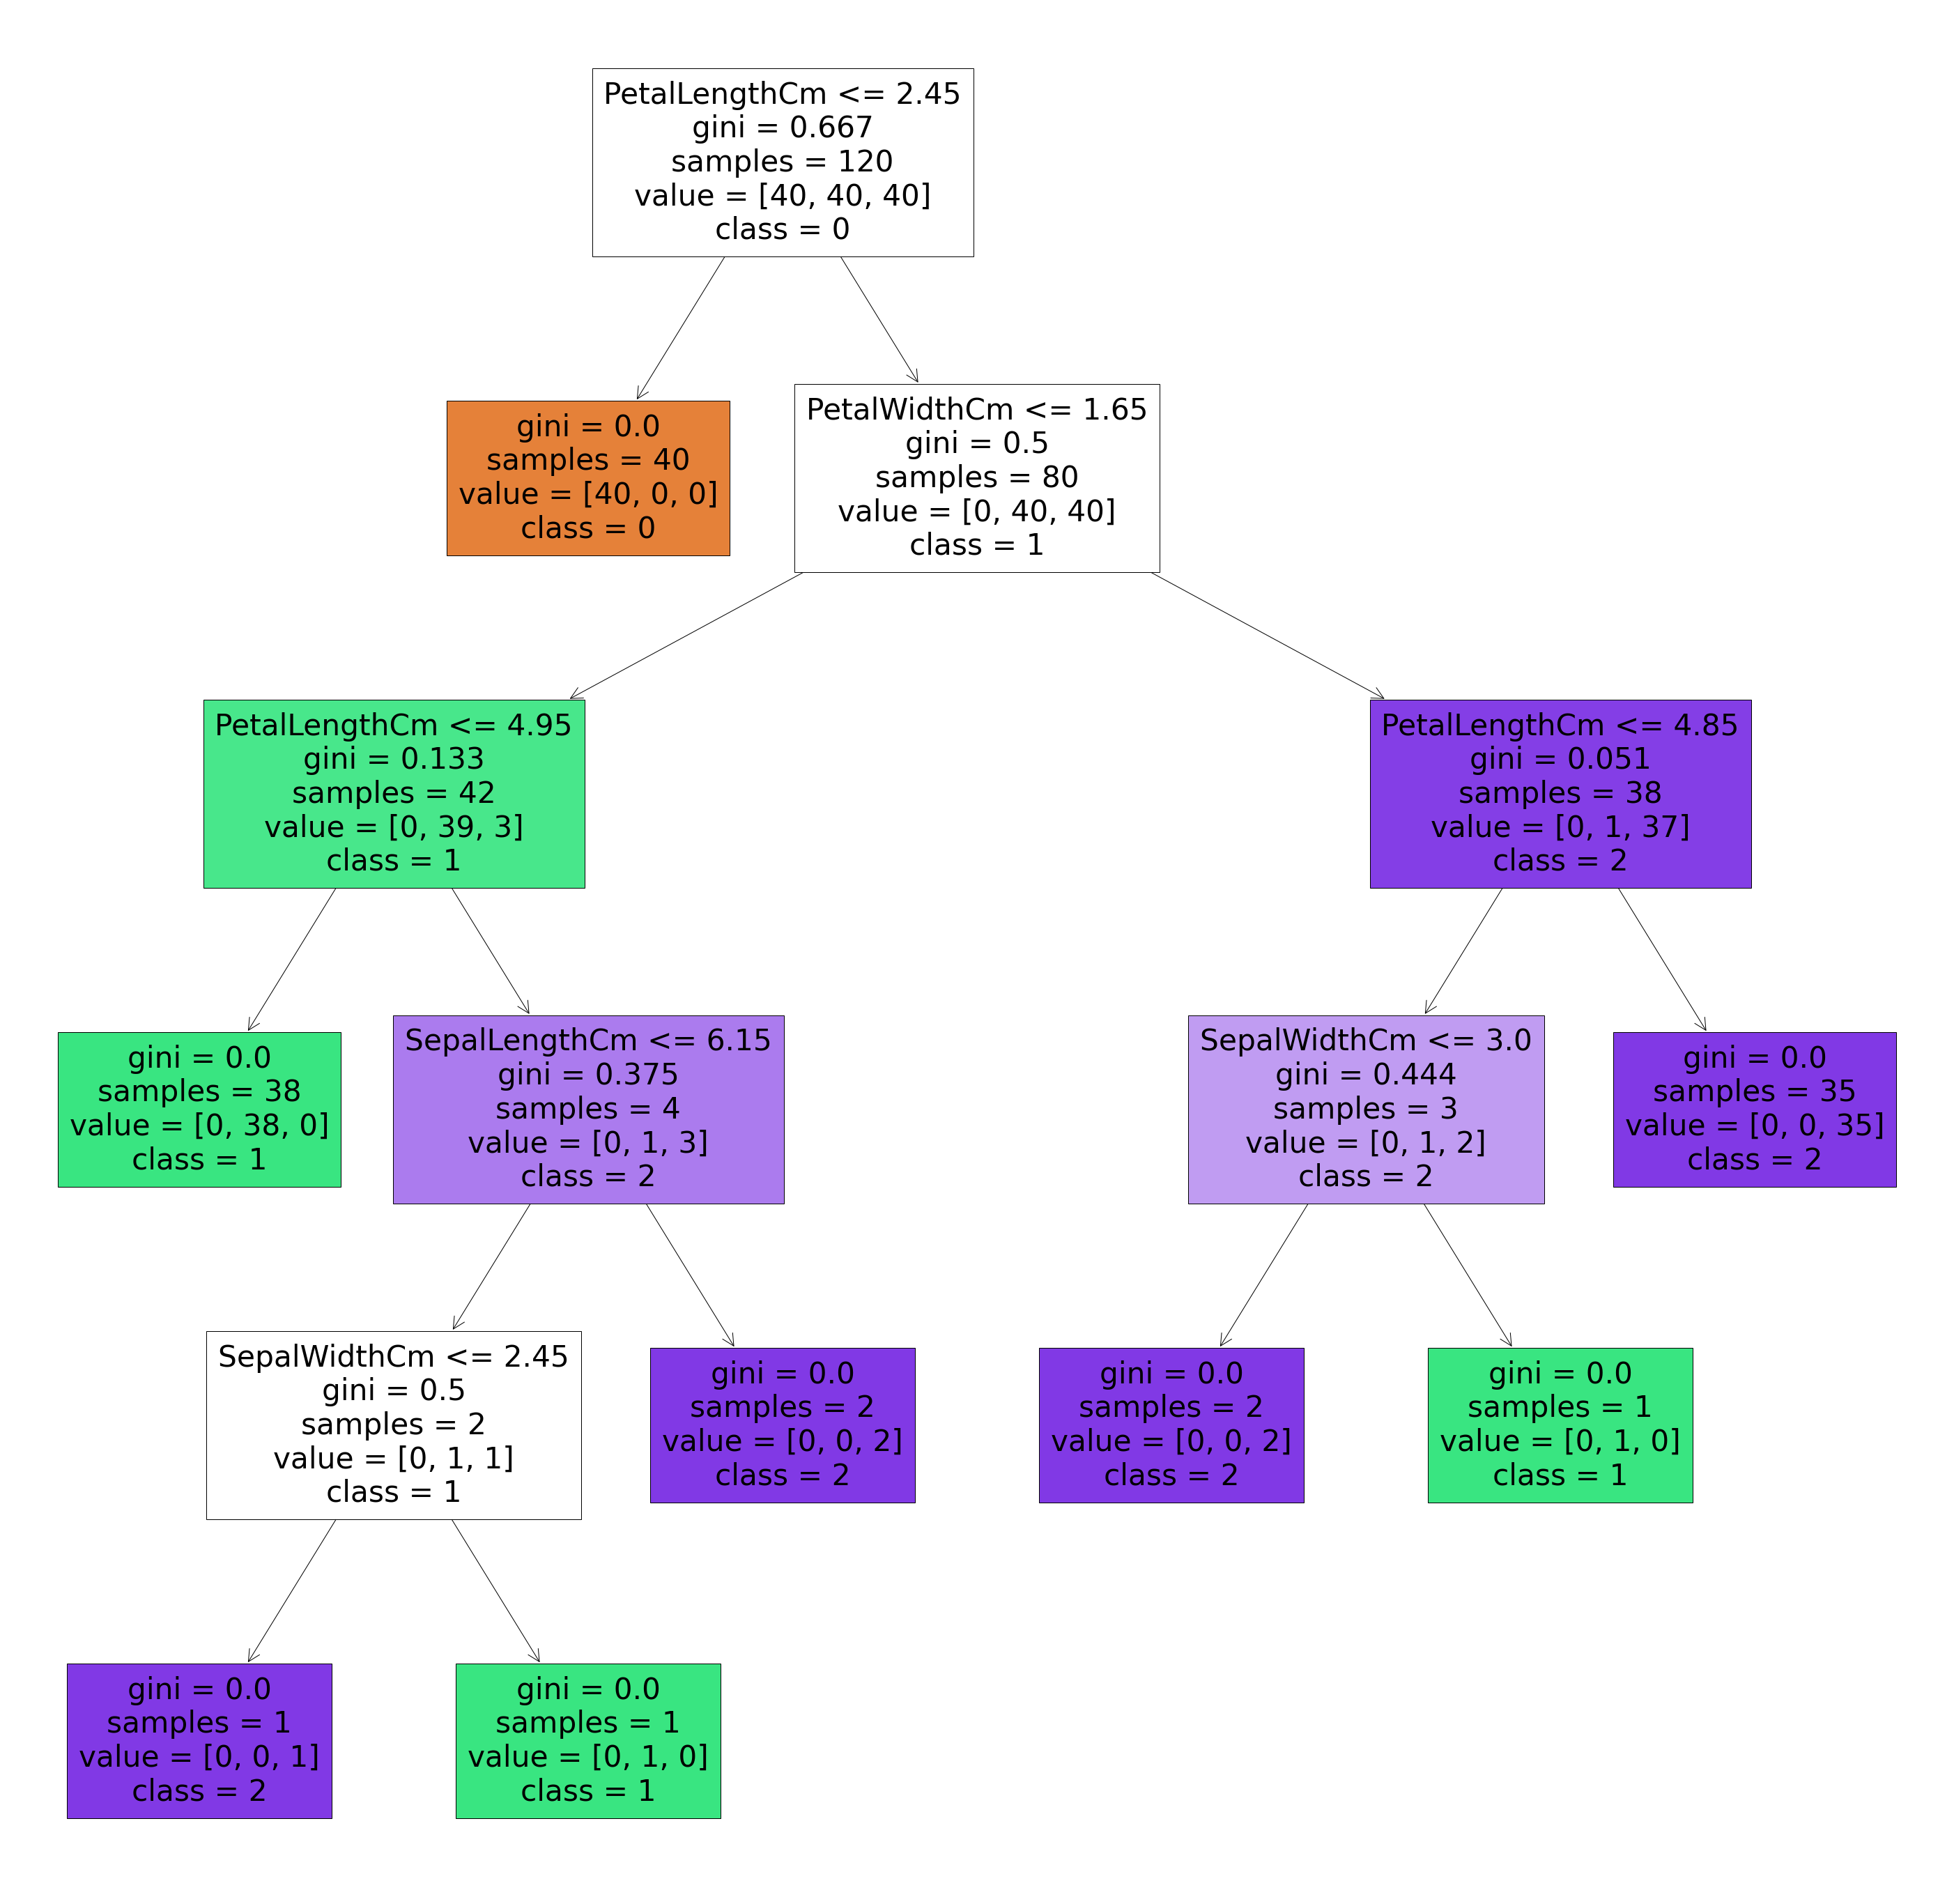

In [99]:
plt.figure(figsize=(50,50))
plot_tree(dt_clf,feature_names=x.columns,class_names=["0","1","2"],filled=True)
print()
plt.savefig("iris_dt.png")

# Hyperparameter Tuninig

In [100]:
dt_clf=DecisionTreeClassifier()


In [103]:
hyperpara={"criterion":['gini',"entropy"],
    "max_depth": np.arange(2,10),
    "min_samples_split": np.arange(2,8),
    "min_samples_leaf": np.arange(1,10)}
gscv=GridSearchCV(dt_clf,hyperpara,cv=5)
gscv.fit(x_train,y_train)
gscv.best_estimator_

DecisionTreeClassifier(max_depth=4)

In [102]:
gscv.best_estimator_

DecisionTreeClassifier(max_depth=4)

In [109]:
dt_clf=DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=8,criterion="gini")
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=8)

In [110]:
# testing data accuaracy
y_pred=dt_clf.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print("the value of mse is",mse)
print("*"*50)
rmse=np.sqrt(mse)
print("the value of rmse is",rmse)
print("*"*50)
r2_value=r2_score(y_test,y_pred)
print("the value of r2_value is",r2_value)

the value of mse is 0.03333333333333333
**************************************************
the value of rmse is 0.18257418583505536
**************************************************
the value of r2_value is 0.95


In [112]:
# training data accuaracy
y_pred_train=dt_clf.predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
print("the value of mse is",mse)
print("*"*50)
rmse=np.sqrt(mse)
print("the value of rmse is",rmse)
print("*"*50)
r2_value=r2_score(y_train,y_pred_train)
print("the value of r2_value is",r2_value)

the value of mse is 0.016666666666666666
**************************************************
the value of rmse is 0.12909944487358055
**************************************************
the value of r2_value is 0.975


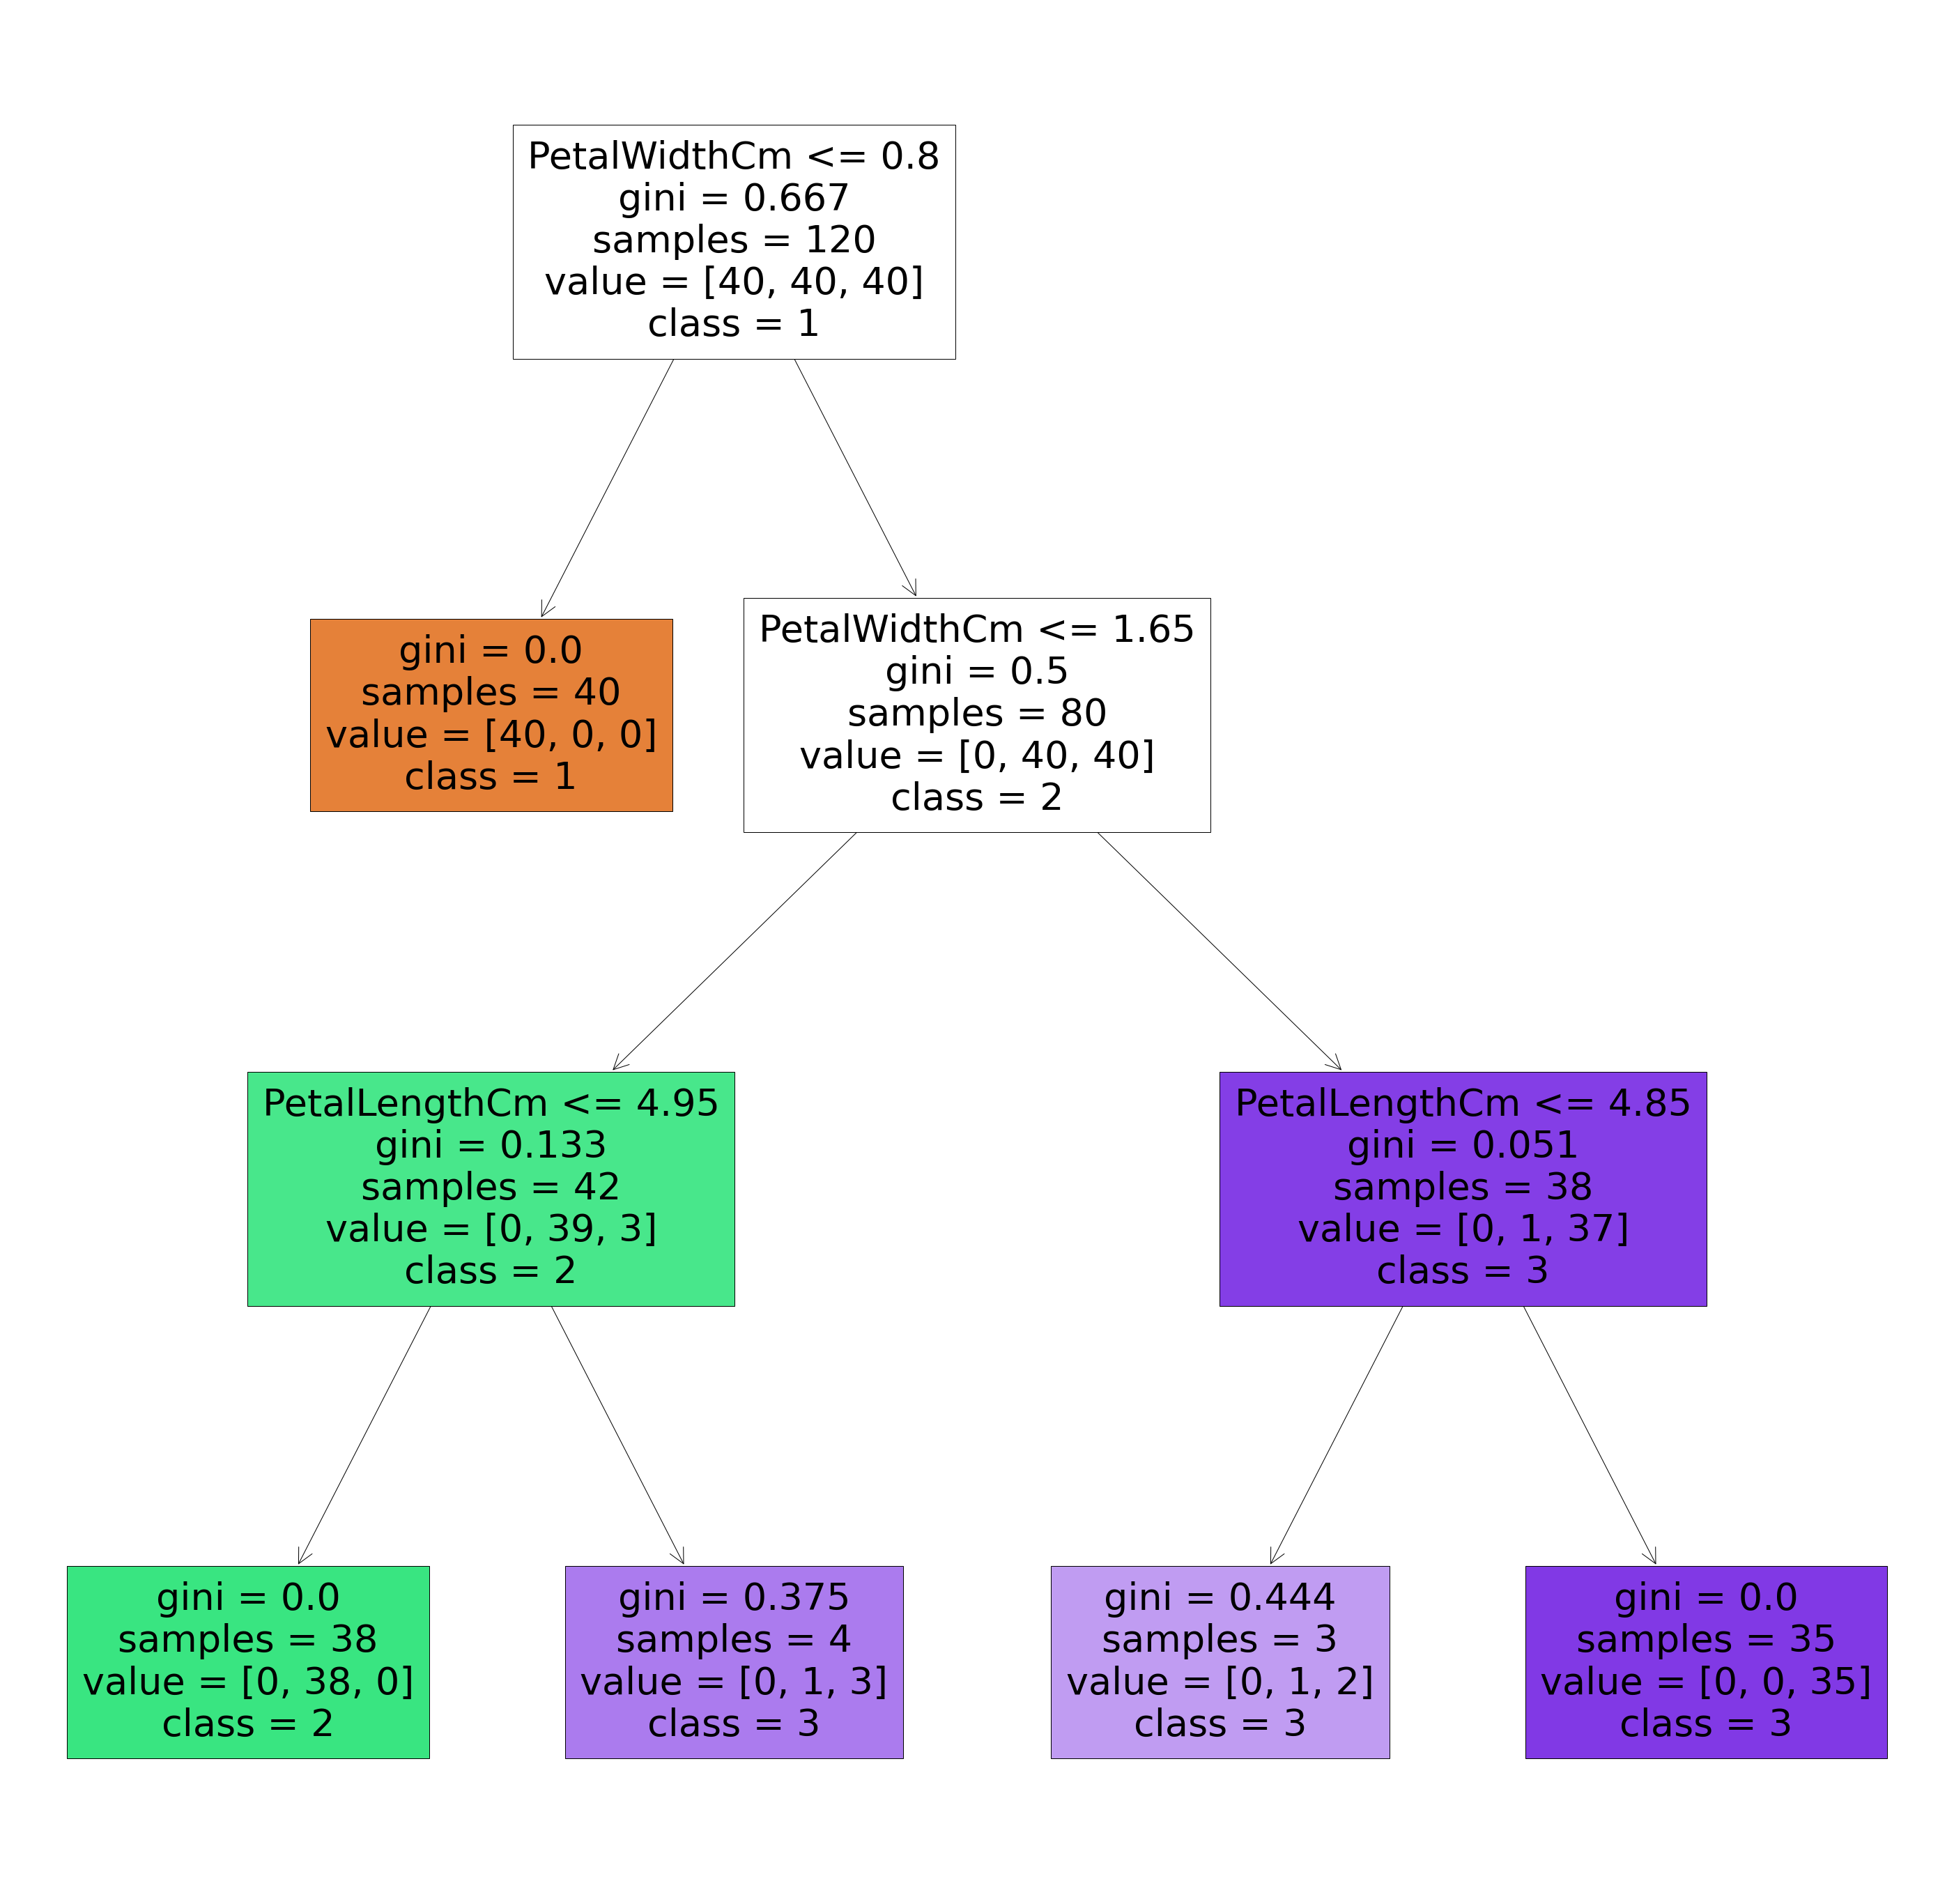

In [121]:
plt.figure(figsize=(50,50))
plot_tree(dt_clf,feature_names=x.columns,class_names=["1","2","3"],filled=True)
print()
plt.savefig("iris_model_hyp.png")

In [113]:
import pickle

In [114]:
with open ("dt_regressor.pkl","wb") as f:
    pickle.dump(dt_reg,f)

In [115]:
import json
project_data={"columns":list(x.columns)}

In [116]:
with open ("project_data.json","w") as f:
    json.dump(project_data,f)

In [117]:
project_data

{'columns': ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']}

In [123]:
SepalWidthCm = 2.5
PetalLengthCm =2.6
PetalWidthCm =2.8
SepalLengthCm = 1

In [125]:
test_array=np.zeros(len(project_data["columns"]))
test_array[0]=SepalLengthCm
test_array[1]=SepalWidthCm
test_array[2]=PetalLengthCm
test_array[3]=PetalWidthCm

In [127]:
dt_clf.predict([test_array])

array([3], dtype=int64)